In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [3]:
#makaleye benzer çizimler yapabilmek için  Seaborn kütüphanesini kulanıyorum.
sns.set_style("darkgrid")

In [4]:
df = pd.read_csv('income.csv')
df.head(50)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
5,44,Private,HS-grad,Widowed,Exec-managerial,Unmarried,Black,Female,0,0,40,United-States,"less than or equal to 50,000"
6,51,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,"less than or equal to 50,000"
7,20,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
8,17,?,11th,Never-married,?,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
9,19,Private,HS-grad,Never-married,Machine-op-inspct,Own-child,Black,Female,0,0,40,United-States,"less than or equal to 50,000"


In [5]:
df.shape
#satır ve sütun sayısı

(31978, 13)

In [6]:
missing=df.isnull().sum()
missing
#veri setindeki eksik  veri yok gözüküyor

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [7]:
ozet=df.describe()
ozet
# genel özeti alıyoruz 
#count kaç kayıt olduğunu gösterir
#mean ortalamadeğeri
#std standart sapma değerini gösterir
#min minimum değeri gösterir
#25% toplam kayıtın yüzde 25'inin ortalama değeri
#50% toplam kayıtın yüzde 50'sinin ortalama değeri
#75% toplam kayıtın yüzde 75'inin ortalama değeri
#max maximum değeri gösterir

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [8]:
ozet2=df.describe(include="O")
ozet2
#Biraz daha ayrıntılı incelemek istersek
# unique benzersiz değerlerin sayısı 
# top en fazla tekrar eden değer
#freq en fazla tekrar eden değerin sıklığı

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [9]:
pd.unique(df["JobType"])
#JopType değerleri:

array([' Private', ' Federal-gov', ' ?', ' Self-emp-inc',
       ' Self-emp-not-inc', ' Local-gov', ' State-gov', ' Without-pay',
       ' Never-worked'], dtype=object)

In [10]:
pd.unique(df["occupation"])
#occupation değerleri:

array([' Adm-clerical', ' Armed-Forces', ' Prof-specialty',
       ' Craft-repair', ' Sales', ' Exec-managerial',
       ' Machine-op-inspct', ' ?', ' Transport-moving',
       ' Farming-fishing', ' Tech-support', ' Other-service',
       ' Handlers-cleaners', ' Protective-serv', ' Priv-house-serv'],
      dtype=object)

In [11]:
#veri setinde aslında eksik değerler olduğunu görüyoruz ancak veriler ? şeklinde olduğu için okunmamış
#verileri NaN olarak okuyoruz
df=pd.read_csv("income.csv", na_values=[" ?","??","???"])
df.head(50)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
5,44,Private,HS-grad,Widowed,Exec-managerial,Unmarried,Black,Female,0,0,40,United-States,"less than or equal to 50,000"
6,51,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,"less than or equal to 50,000"
7,20,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
9,19,Private,HS-grad,Never-married,Machine-op-inspct,Own-child,Black,Female,0,0,40,United-States,"less than or equal to 50,000"


In [12]:
missing=df.isnull().sum()
missing
#veri setindeki eksik veriler

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [13]:
#Occupation 1816 , JobType 1809 boş veri içeriyor.


In [14]:
cells = np.product(df.shape)
cells
#toplam hücre

415714

In [15]:
total_missing = missing.sum()
total_missing
#toplam kayıp hücre

3625

In [16]:
(total_missing/cells) * 100
#kayıp hücrenin oranı toplam hücreye kıyasla çok az


0.8719937264561695

In [17]:
null_data=df[df.isnull().any(axis=1)]
null_data


,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,59,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31934,20,NaN,HS-grad,Never-married,NaN,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,NaN,Some-college,Married-civ-spouse,NaN,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"
31967,80,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000"


In [18]:
#eksik verilerin olduğu satırları siliyoruz çünkü eksik veriler genel veri setine göre çok az
df.dropna(axis=0,inplace=True)
df.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [19]:
df.shape

(30162, 13)

In [20]:
#Pearson korelasyonuyla değerlerin aralarındaki ilişkilere bakıyoruz.
corelation_pearson=df.corr(method="pearson")

In [21]:
corelation_pearson

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


In [22]:
# cinsiyet dağılımına bakıyoruz
gender_=pd.crosstab(index=df["gender"],columns="count")
gender_

col_0,count
gender,
Female,9782
Male,20380


In [23]:
#Erkeklerin oranının daha fazla olduğunu görüyoruz.

In [24]:
# Cinsiyete göre maaş dağılımına bakıyoruz.Bunu yaparken tüm değerleri değerlerin toplaımına bölerek normalizasyon yapıyor.
gender_salarystatus=pd.crosstab(index=df["gender"],columns=df["SalStat"],normalize="index")
gender_salarystatus

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.113678,0.886322
Male,0.313837,0.686163


In [25]:
#Erkeklere kıyasla daha fazla  kadının maaşının 50 binin altında olduğunu görüyoruz.

In [26]:
#Yaşa göre maaş dağılıma bakıyoruz.
age_SalStat=pd.crosstab(index=df["SalStat"],columns=df["age"],normalize="index")
age_SalStat

age,17,18,19,20,21,22,23,24,25,26,...,79,80,81,82,83,84,85,86,88,90
SalStat,,,,,,,,,,,,,,,,,,,,,
"greater than 50,000",0.000000,0.000000,0.000133,0.000000,0.00040,0.001598,0.001598,0.003996,0.007059,0.008125,...,0.000799,0.000133,0.000266,0.000000,0.000266,0.000133,0.000000,0.000000,0.000000,0.000932
"less than or equal to 50,000",0.014479,0.019732,0.026176,0.027766,0.02728,0.029222,0.035844,0.031871,0.032930,0.030193,...,0.000397,0.000662,0.000486,0.000309,0.000132,0.000309,0.000132,0.000044,0.000132,0.001236


In [27]:
#Eğitime göre maaş dağılımına bakıyoruz.
salStat_edu=pd.crosstab(index=df["EdType"],columns=df["SalStat"],normalize="index",margins=True )
salStat_edu

SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,0.071951,0.928049
11th,0.056298,0.943702
12th,0.076923,0.923077
1st-4th,0.039735,0.960265
5th-6th,0.041667,0.958333
7th-8th,0.062837,0.937163
9th,0.054945,0.945055
Assoc-acdm,0.253968,0.746032
Assoc-voc,0.263198,0.736802


In [28]:
# Eğitim seviyesi yükseldikçe 50 binden fazla maaş alma olasılığının yükseldiğini görüyoruz.

In [29]:
#Maaş durumunun frekans dağılımı:

<AxesSubplot:title={'center':'Frequency Distribution of SalStat'}, xlabel='SalStat', ylabel='count'>

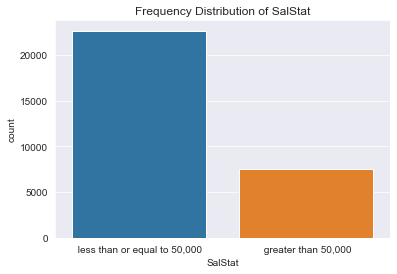

In [30]:
plt.figure(1)
plt.title('Frequency Distribution of SalStat')
sns.countplot(x="SalStat",data=df)

In [31]:
# Yaş durumunun dağılımı:

<AxesSubplot:title={'center':'Histogram on Age '}, xlabel='age'>

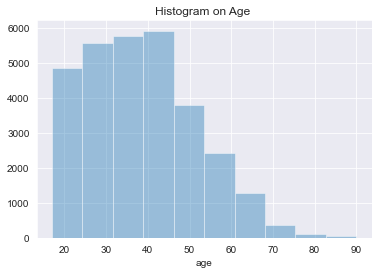

In [85]:
plt.figure(2)
plt.title('Histogram on Age ')
plt.xlabel("age")
sns.distplot(df["age"],bins=10, kde=False)

In [84]:
#40-50 yaş en yüksek frekansa sahip

In [34]:
#Yaşa göre maaş dağılımını görselleştiriyoruz.

<AxesSubplot:title={'center':'Age vs Salary Status'}, xlabel='age', ylabel='SalStat'>

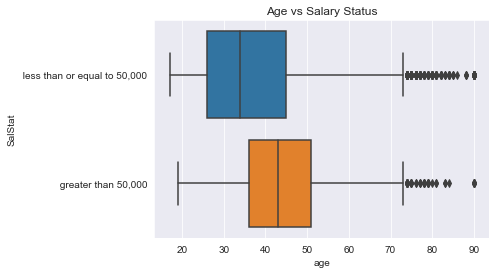

In [35]:
plt.figure(3)
plt.title("Age vs Salary Status")
sns.boxplot(x=df["age"],y=df["SalStat"])

In [36]:
#40 ila 50 yaş grubundaki kişilerin maaş statüsünün 50 binden fazla olma olasılığı daha yüksektir.

<AxesSubplot:xlabel='count', ylabel='JobType'>

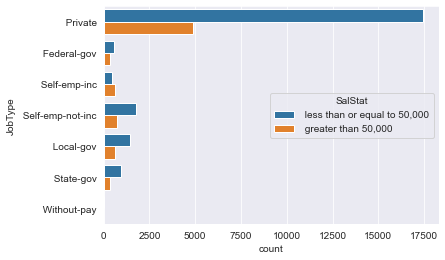

In [37]:
# İş tipine göre maaş dağılımı:
plt.figure(4)
sns.countplot(y="JobType",data=df,hue="SalStat")

In [38]:
salStat_Job=pd.crosstab(index=df["JobType"],columns=df["SalStat"],normalize="index",margins=True )
salStat_Job

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,0.387063,0.612937
Local-gov,0.294630,0.705370
Private,0.218792,0.781208
Self-emp-inc,0.558659,0.441341
Self-emp-not-inc,0.285714,0.714286
State-gov,0.268960,0.731040
Without-pay,0.000000,1.000000
All,0.248922,0.751078


In [39]:
#Self-emp-inc yani serbest meslek sahibi kişilerin 50 binden fazla kazanama olasılığı daha yüksek.
#Private yani özel firmada çalışanların 50 binden az kazanma olsaılığı daha yüksek.
#Bunlar maaş durumunu sınıflandırmak için önemli değişkenlerdir.

<AxesSubplot:title={'center':'Occupation Vs SalStat'}, xlabel='count', ylabel='occupation'>

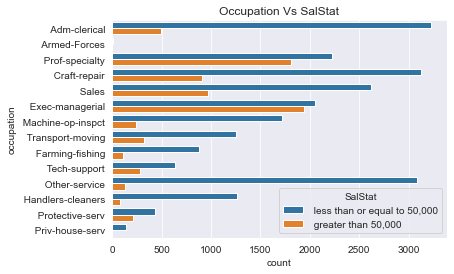

In [40]:
plt.figure(5)
plt.title("Occupation Vs SalStat")
sns.countplot(y="occupation",data=df,hue="SalStat")

In [41]:
# Meslek ve maaş dağılımını görüyoruz. En fazla kişinin çalıştığı meslekler adm-clerical , craft-repair, other-service .

<AxesSubplot:title={'center':'Capital Gain vs SalStat'}, xlabel='capitalgain'>

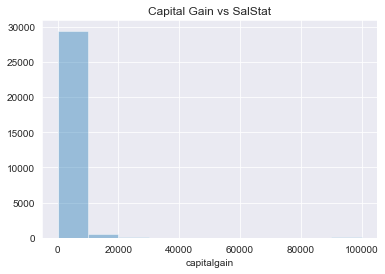

In [86]:
plt.figure(6)
plt.title("Capital Gain vs SalStat")
sns.distplot(df["capitalgain"],bins=10,kde=False)

In [43]:
salStat_capitalgain=pd.crosstab(index=df["capitalgain"],columns="count" )
salStat_capitalgain

col_0,count
capitalgain,
0,27624
114,6
401,1
594,28
914,8
...,...
25236,11
27828,32
34095,3


In [44]:
#27624 kişinin capital gain yani sermaye kazancı 0'dır.

In [45]:
salStat_capitalloss=pd.crosstab(index=df["capitalloss"],columns="count" )
salStat_capitalloss

col_0,count
capitalloss,
0,28735
155,1
213,4
323,3
419,1
...,...
3004,1
3683,2
3770,2


In [46]:
#28735 kişinin capital loss yani sermaye kaybı 0'dır.

<AxesSubplot:title={'center':'Capital Loss vs SalStat'}, xlabel='capitalloss'>

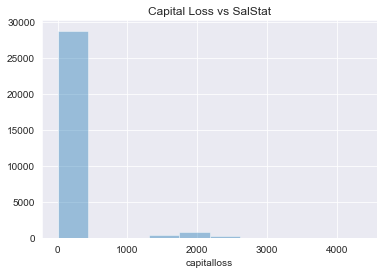

In [87]:
plt.figure(7)
plt.title("Capital Loss vs SalStat")
sns.distplot(df["capitalloss"],bins=10,kde=False)

<AxesSubplot:xlabel='capitalgain', ylabel='Count'>

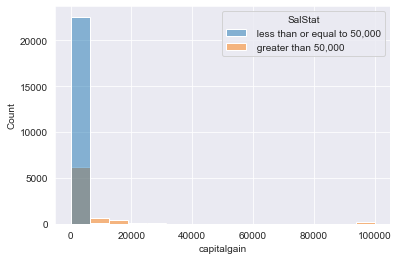

In [48]:
plt.figure(8)
sns.histplot(x="capitalgain",data=df,hue="SalStat")

In [49]:
#Yatırım yapmış ve sermayesi olan kişilerin maaşı 50 binden fazladır.

In [50]:
# KNN ve Logistic Regresyonu uygulamadan önce değerleri sayısallaştırıyoruz.

In [51]:
#Map fonksiyonunu kullanıyoruz.

In [52]:
df["SalStat"]=df["SalStat"].map({" less than or equal to 50,000":0," greater than 50,000":1})

In [53]:
df.head(50)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,0
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,0
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,0
5,44,Private,HS-grad,Widowed,Exec-managerial,Unmarried,Black,Female,0,0,40,United-States,0
6,51,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,0
7,20,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,0
9,19,Private,HS-grad,Never-married,Machine-op-inspct,Own-child,Black,Female,0,0,40,United-States,0
10,45,Self-emp-inc,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,55,United-States,1


In [54]:
# Görüldüğü gibi SalStat  sütunu 1 ve 0 değerleirne dönüştü.

In [55]:
#Daha sonra sonucu etkilemeyeceğini düşündüğümüz sütünları kaldırıyoruz.

In [56]:
df.drop('race',axis=1, inplace=True)
df.drop('nativecountry',axis=1, inplace=True)
df.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,gender,capitalgain,capitalloss,hoursperweek,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,Female,0,0,28,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,Male,0,0,40,0
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,Male,0,0,40,1
3,27,Private,9th,Never-married,Craft-repair,Other-relative,Male,0,0,40,0
4,20,Private,Some-college,Never-married,Sales,Not-in-family,Male,0,0,35,0


In [57]:
#Dummy data yani kukla değişken ile verileri sayısal değerlere çevirdik .
df=pd.get_dummies(data=df,drop_first=True)

In [58]:
df.head(5)

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,...,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,gender_ Male
0,45,0,0,28,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,44,0,0,40,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,27,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,20,0,0,35,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [59]:
# Logistic Regression 

In [60]:
# x data özellikleri içerecek bu yüzden SalSatı atıyoruz.
x_data=df.drop("SalStat",axis=1)
x_data=x_data.values # diziye dönüştürdük.

In [61]:
x_data

array([[45,  0,  0, ...,  0,  0,  0],
       [24,  0,  0, ...,  0,  0,  1],
       [44,  0,  0, ...,  0,  0,  1],
       ...,
       [23,  0,  0, ...,  0,  0,  1],
       [42,  0,  0, ...,  0,  1,  0],
       [29,  0,  0, ...,  0,  0,  1]], dtype=int64)

In [62]:
y_data=df["SalStat"].values
y_data

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [63]:
#Eğitim ve test verimizi ayırıyoruz, yüzde 30'u test verisi olacak.
X_train,X_test,Y_train,Y_test=train_test_split(x_data,y_data,test_size=0.3,random_state=0)

In [64]:
#Eğitimimizi başlatıyoruz.

In [65]:
logreg=LogisticRegression(max_iter=10000)

In [66]:
logreg.fit(X_train,Y_train)

LogisticRegression(max_iter=10000)

In [67]:
#katsayılar
logreg.coef_

array([[ 2.24647922e-02,  3.18399452e-04,  6.53233028e-04,
         2.64332242e-02, -8.20584021e-01, -5.48290367e-01,
        -3.83873397e-01, -1.02870564e+00, -8.38251928e-01,
        -5.42784326e-02, -9.86789044e-01, -4.10899219e-01,
        -4.05443668e-01, -7.31035279e-01, -1.28271504e+00,
        -8.86711856e-01, -1.74187361e-01,  5.18286979e-02,
         7.21845722e-01,  1.27821495e+00, -3.24479224e-01,
         9.04561566e-01, -1.73810580e-01,  1.13632068e+00,
        -8.18228107e-02,  1.57589145e-01,  8.23170745e-01,
        -1.45988080e-01, -6.21307013e-01, -4.84826556e-01,
        -2.14098777e-01, -1.68707152e-02, -1.52864147e-01,
         7.17041486e-01, -1.22201067e+00, -9.94372375e-01,
        -5.79609853e-01, -1.19541109e+00, -2.02118184e-01,
         4.89842957e-01,  3.92257092e-01,  9.00345070e-02,
         7.02979025e-01, -3.69405069e-01, -9.50240391e-01,
        -8.89855183e-01, -1.68220543e+00, -1.12197677e+00,
         9.08758822e-01,  6.43895730e-01]])

In [68]:
#interception 
logreg.intercept_

array([-3.50341045])

In [69]:
#Test ediyoruz.
prediction=logreg.predict(X_test)

In [70]:
#Doğruluk değerleri:
Accuracy_score=accuracy_score(Y_test,prediction)
Confusion_matrix=confusion_matrix(Y_test,prediction)

In [71]:
#Doğruluk değeri
print(Accuracy_score)

0.8438501491877556


In [72]:
#Yanlış sınıflandırılan örneklere bakalım:
print("Yanlış sınıflandırılmış örnekler = ", (prediction !=Y_test).sum())

Yanlış sınıflandırılmış örnekler =  1413


Text(0.5, 257.44, 'Tahmin Etiketi')

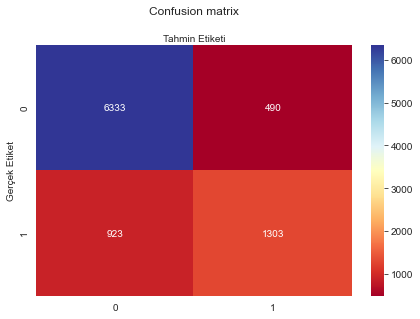

In [73]:
#Modelimizi çizdirelim.
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(Confusion_matrix), annot=True, cmap="RdYlBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Gerçek Etiket')
plt.xlabel('Tahmin Etiketi')

In [74]:
#Knn Sınıflandırması

In [75]:
from sklearn.neighbors import KNeighborsClassifier


In [76]:
Accuracy_score_KNN={}
for i in range(1,20):
    
    KNN=KNeighborsClassifier(n_neighbors=i,metric="minkowski")
    
    # Eğitimimizi başlatıyoruz.
    
    KNN.fit(X_train,Y_train)
    
    # Testi başlatıyoruz.
    Y_pred_knn=KNN.predict(X_test)
    
    #Doğruluk değerlerini bir listede tutuyoruz.
    Accuracy_score_KNN[i]=accuracy_score(Y_test,Y_pred_knn)
    

In [77]:
print(Accuracy_score_KNN)

{1: 0.8058348988838546, 2: 0.8314730909492761, 3: 0.8310310531550448, 4: 0.8376616200685159, 5: 0.8371090728257266, 6: 0.8419714885622721, 7: 0.83898773345121, 8: 0.84053486573102, 9: 0.8417504696651563, 10: 0.8445132058791026, 11: 0.8439606586363134, 12: 0.8463918665045861, 13: 0.8440711680848713, 14: 0.8449552436733341, 15: 0.8444026964305448, 16: 0.8450657531218919, 17: 0.8436291302906398, 18: 0.843518620842082, 19: 0.8437396397391977}


In [78]:
#En büyük doğruluk değeri 12 komşu değeriyle çalıştığında elde ediliyor.
Accuracy_score_KNN[12]

0.8463918665045861

In [79]:
# Bu sonuçlara göre benim bulduğum KNN doğruluk değeri makaleden daha iyiyken, makalenin bulduğu Logistik Regresyon doğruluk 
#değeri benimkinden daha iyi ancak çok yakın.

In [80]:
KNN=KNeighborsClassifier(n_neighbors=12,metric="minkowski")
KNN.fit(X_train,Y_train)
Y_pred_knn=KNN.predict(X_test)
    

In [81]:
Confusion_matrixKNN=confusion_matrix(Y_test,Y_pred_knn)


Text(0.5, 257.44, 'Tahmin Etiketi')

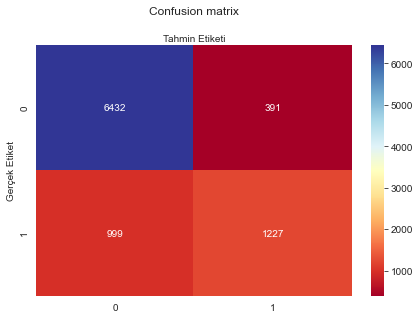

In [82]:
#Modelimizi çizdirelim.
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(Confusion_matrixKNN), annot=True, cmap="RdYlBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Gerçek Etiket')
plt.xlabel('Tahmin Etiketi')

In [ ]:
#Knn için confusion matrix